Regression Project : Bike Sharing Demand 

1. Data Cleasing & Visualizaing

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [204]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [205]:
# object data type 변경 -- > datetime.apply(pd.to_datetime)

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)


In [206]:
# datetime type에서 year, month, day, hour 추출 후 원데이터 삭제 --> .datetime.apply(lambda x: x.year)

bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()




,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [207]:
# 'datetime'등 불필요한 원데이터 삭제 --> drop()

drop_columns = ['datetime','casual','registered']

bike_df.drop(drop_columns, axis=1, inplace=True)



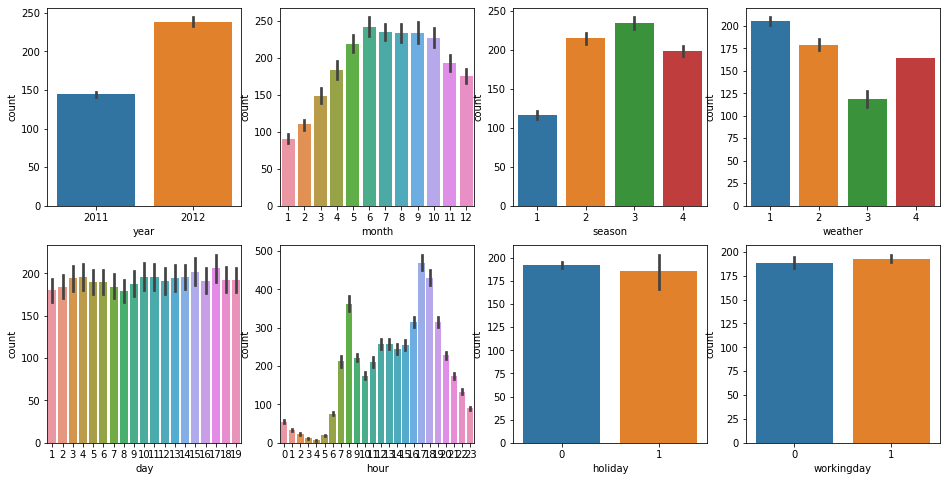

In [208]:
# visualization

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

cat_features = ['year', 'month', 'season','weather', 'day', 'hour', 'holiday', 'workingday']


## cat_features 모든 칼럼별로 개별 칼럼값에 따른 count합을 barplot으로 시각화

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    
    ### seaborn barplot을 이용 칼럼값에 따른 count합 표현 
    
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col] )

2. 평가함수 정의하기 

In [209]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [210]:
# RMSLE root mean squared log error --> log1p() 

def rmsle(y,pred) :
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2 
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle


In [211]:
# RMSE root mean squared error 

def rmse(y, pred) :
    return np.sqrt(mean_squared_error(y,pred))                  
                   

In [212]:
# MAE, RMSE, RMSLE 모두 계산하는 평가함수 

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE:{0: .3f}, RMSE:{1:.3F}, MAE:{2: .3F}'.format(rmsle_val, rmse_val, mae_val))
    

3. 로그변환, 피처인코딩, 모델 학습/예측/평가 

In [213]:
# LinearRegression객체를 이용한 회귀모델 학습/예측/평가  

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis =1, inplace=False)


X_train, X_test, y_train, y_test = train_test_split (X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 1.165, RMSE:140.900, MAE: 105.924


In [214]:
# 실제값과 예측값 차이 오류값 분석 

def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff']= np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5) 

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

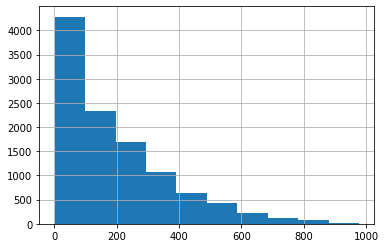

In [215]:
# target값 정규분포치 히스토그램 확인 --> .hist()
y_target.hist()

<AxesSubplot:>

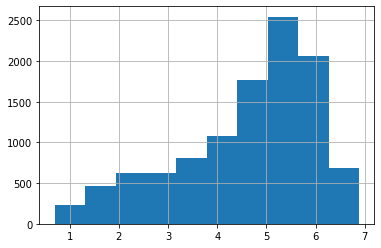

In [216]:
# 왜곡된 분포도를 정규분포형태로 변환  --> log1p() / expm1()

y_log_transform = np.log1p(y_target)

y_log_transform.hist()

1) 로그변환을 통한 모델성능 향상

In [217]:
# Target Column값 로그값으로 변환 --> np.log1p()

y_target_log = np.log1p(y_target)


# 로그변환값 반영 Train/Test Dataset 분할

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 로그변환값 원스케일로 변환 --> expm1()

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp) 

RMSLE: 1.017, RMSE:162.594, MAE: 109.286


2) feature encoding을 통한 모델성능 향상

<AxesSubplot:>

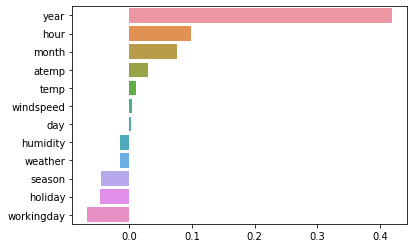

In [218]:
# feature coefficents 시각화 

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [219]:
# Feature Encoding --> One Hot Encoding : get_dummies() 

X_features_ohe = pd.get_dummies(X_features, columns = [ 'year','month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

3) 로그변환 target data, Ohe X_features 기반 Lienar(Ridge,Lasso) Model 학습/예측/평가

In [220]:
# OHE 변환 데이터세트 기반으로 Train/Test Data Split

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)


In [221]:
# 성능평가수치 반환 함수 

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 : 
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)    
    

In [222]:
# 모델별 평가 수행

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg] :
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

### LinearRegression ###
RMSLE: 0.590, RMSE:97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE:98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE:113.219, MAE: 72.803


<AxesSubplot:>

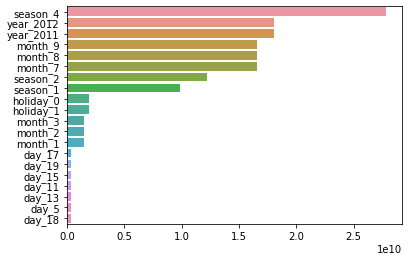

In [223]:
# Feature Coefficients 회귀계수 재확인 시각화 

coef = pd.Series(lr_reg.coef_, index= X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

4) 로그변환 target data, Ohe X_features 기반 Tree Model 학습/예측/평가

In [236]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 

In [237]:
# RandomForest, GBM, XGBoost, LightGBM model별 평가 수행

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimator=500)
lgbm_reg = LGBMRegressor(n_estimator=500)

   ## XGBoost 오류 발생방지를 위해 dataFrame vlues 속성을 이용 numpy ndarray로 변환
    
for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)
    

### RandomForestRegressor ###
RMSLE: 0.355, RMSE:50.282, MAE: 31.163
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE:53.338, MAE: 32.746
[08:49:08] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


### XGBRegressor ###
RMSLE: 0.340, RMSE:52.002, MAE: 31.603
[LightGBM] [Warning] Unknown parameter: n_estimator
### LGBMRegressor ###
RMSLE: 0.332, RMSE:51.381, MAE: 31.833


!!!!! Well Done MikyBorder !!!!! 